<a href="https://colab.research.google.com/github/AshutoshDhungana/Fare_amount_prediction/blob/main/TCfellowship_Ashutosh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('uber.csv', index_col=0)

In [ ]:
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [ ]:
df.shape


(200000, 8)

In [ ]:

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [ ]:
df.nunique()

key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [ ]:
df.sample(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
35364001,2010-08-14 19:23:00.000000120,7.30,2010-08-14 19:23:00 UTC,-73.975887,40.748927,-73.984153,40.759833,2
6162607,2013-01-24 04:50:11.0000002,7.50,2013-01-24 04:50:11 UTC,-73.934400,40.751318,-73.965799,40.762127,1
54179994,2013-09-06 23:30:21.0000002,5.00,2013-09-06 23:30:21 UTC,-73.991196,40.765458,-73.989883,40.775662,2
11312171,2014-12-06 16:44:13.0000001,42.83,2014-12-06 16:44:13 UTC,-73.862759,40.768851,-73.991985,40.738330,1
12302953,2014-06-21 19:51:00.00000035,7.00,2014-06-21 19:51:00 UTC,-74.002050,40.734902,-73.999333,40.720977,1
54476483,2013-10-27 03:24:00.000000162,5.00,2013-10-27 03:24:00 UTC,-74.152988,40.608902,-74.148235,40.612362,5
3966043,2011-09-01 07:20:00.000000122,6.10,2011-09-01 07:20:00 UTC,-74.003945,40.731745,-74.013347,40.715307,1
17124977,2009-02-13 12:23:19.0000002,3.70,2009-02-13 12:23:19 UTC,-73.947679,40.775224,-73.956280,40.775871,1
8142921,2014-10-23 11:21:00.00000054,9.50,2014-10-23 11:21:00 UTC,-73.971775,40.750765,-73.971582,40.763297,1
6489259,2011-05-18 18:23:00.000000157,5.30,2011-05-18 18:23:00 UTC,-73.976537,40.754007,-73.971733,40.756438,3


In [ ]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [ ]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
dtype: int64

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'


In [ ]:
df['time_of_day'] = df['pickup_hour'].apply(categorize_time)
print(df['time_of_day'])

24238194      evening
27835199      evening
44984355        night
25894730      morning
17610152      evening
              ...    
42598914      morning
16382965        night
27804658        night
20259894    afternoon
11951496        night
Name: time_of_day, Length: 199999, dtype: object


In [ ]:
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,23.000000


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,13.491387
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,6.515505
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,23.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 24238194 to 11951496
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   distance_km        199999 non-null  float64            
 9   pickup_hour        199999 non-null  int32              
 10  time_of_day        199999 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(1), object(2)
memory usage: 17.5

In [ ]:
df.shape

(199999, 11)

In [ ]:
pickup_longitude_outliers = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]
pickup_latitude_outliers = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]

try:
    df.drop(pickup_longitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for pickup_longitude_outliers: {e}")

try:
    df.drop(pickup_latitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for pickup_latitude_outliers: {e}")


In [ ]:
# Filter out indices that are present in df
existing_longitude_outliers = pickup_longitude_outliers.index.intersection(df.index)
existing_latitude_outliers = pickup_latitude_outliers.index.intersection(df.index)

# Drop these existing outlier indices
df.drop(existing_longitude_outliers, inplace=True)
df.drop(existing_latitude_outliers, inplace=True)


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000,199989.000000
mean,11.359883,-72.501801,39.917945,-72.514942,39.924303,1.684558,20.634957,13.491532
std,9.901824,10.449904,6.130381,10.517919,6.201159,1.386002,380.457537,6.515433
min,-52.000000,-93.824668,-74.015515,-737.916665,-74.015750,0.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734792,-73.991407,40.733823,1.000000,1.215178,9.000000
50%,8.500000,-73.981823,40.752591,-73.980092,40.753042,1.000000,2.120856,14.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000,3.874843,19.000000
max,499.000000,40.808425,48.018760,40.831932,493.533332,208.000000,10321.507661,23.000000


In [ ]:
dropoff_longitude_outliers = df[(df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)]
dropoff_latitude_outliers = df[(df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)]

In [ ]:
try:
    df.drop(dropoff_longitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for dropoff_longitude_outliers: {e}")


try:
    df.drop(dropoff_latitude_outliers.index, inplace=True)
except KeyError as e:
    print(f"KeyError for dropoff_latitude_outliers: {e}")

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544,20.560330,13.491562
std,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999,379.620738,6.515458
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000,1.215167,9.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2.120825,14.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000,3.874779,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,8782.898606,23.000000


In [ ]:
fare_amount_outliers_min = df[df['fare_amount'] <= 5]
fare_amount_outliers_max = df[df['fare_amount'] > 500]

In [ ]:
try:
    df.drop(fare_amount_outliers_min.index, inplace=True)
except KeyError as e:
    print(f"KeyError for fare_amount_outliers_min: {e}")
try:
    df.drop(fare_amount_outliers_max.index, inplace=True)
except KeyError as e:
    print(f"KeyError for fare_amount_outliers_max: {e}")

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000,168901.000000
mean,12.664186,-72.513453,39.923742,-72.535632,39.934572,1.694768,20.228439,13.525290
std,10.246582,10.411226,6.117170,10.330174,6.082658,1.406254,369.787080,6.531421
min,5.100000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000,0.000000
25%,7.000000,-73.992292,40.733990,-73.991535,40.732484,1.000000,1.575278,9.000000
50%,9.300000,-73.981982,40.752158,-73.980090,40.752603,1.000000,2.492311,14.000000
75%,13.800000,-73.967402,40.766608,-73.963253,40.767430,2.000000,4.368860,19.000000
max,499.000000,40.806012,48.018760,40.831932,45.031598,208.000000,8776.106279,23.000000


In [ ]:
distance_km_outliers_min = df[df['distance_km'] <= 0.1]
distance_km_outliers_max = df[df['distance_km'] > 450]

In [ ]:
try:
    df.drop(distance_km_outliers_min.index, inplace=True)
except KeyError as e:
    print(f"KeyError for distance_km_outliers_min: {e}")

try:
    df.drop(distance_km_outliers_max.index, inplace=True)
except KeyError as e:
    print(f"KeyError for distance_km_outliers_max: {e}")

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000
mean,12.564967,-73.908928,40.686569,-73.907788,40.686810,1.695203,3.846178,13.524689
std,9.813609,2.711284,2.654585,2.711376,2.654954,1.315074,4.409367,6.528907
min,5.100000,-77.316665,-74.015515,-75.458979,-74.015750,0.000000,0.100431,0.000000
25%,7.000000,-73.992523,40.735335,-73.991727,40.734119,1.000000,1.645133,9.000000
50%,9.300000,-73.982272,40.752737,-73.980567,40.753283,1.000000,2.556488,14.000000
75%,13.700000,-73.968701,40.767040,-73.965106,40.767862,2.000000,4.440247,19.000000
max,230.000000,40.806012,42.478467,40.831932,42.464187,6.000000,367.442145,23.000000


<Axes: xlabel='distance_km', ylabel='fare_amount'>

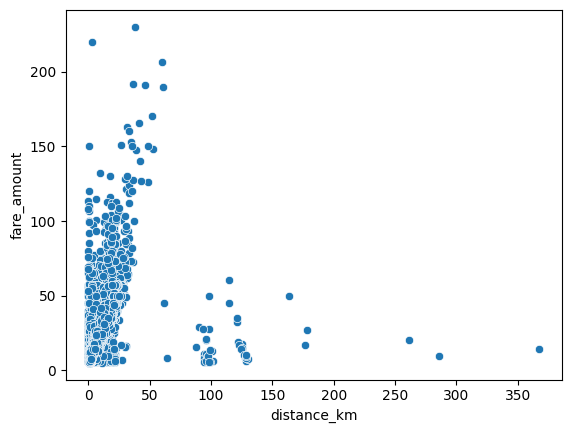

In [ ]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)

<ipython-input-66-6c8f08d01823>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'], bins = 10)


<Axes: xlabel='fare_amount', ylabel='Density'>

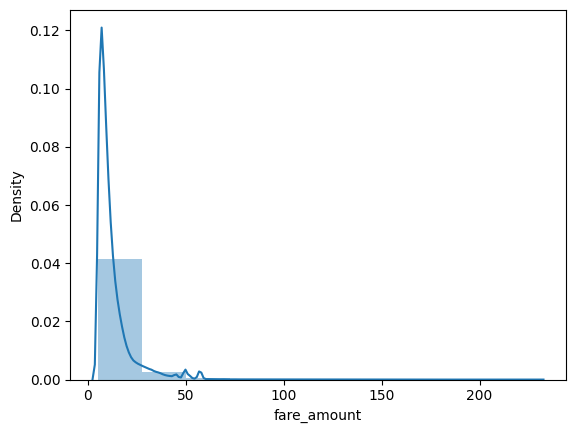

In [ ]:
sns.distplot(df['fare_amount'], bins = 10)

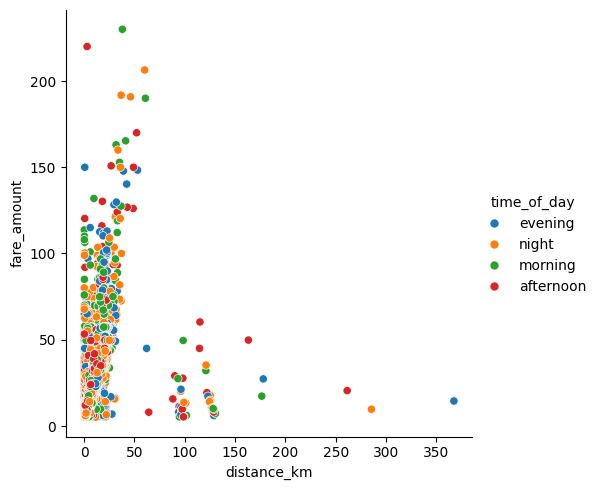

In [ ]:
sns.relplot(x='distance_km', y='fare_amount', data=df, hue='time_of_day')

<Axes: xlabel='time_of_day', ylabel='fare_amount'>

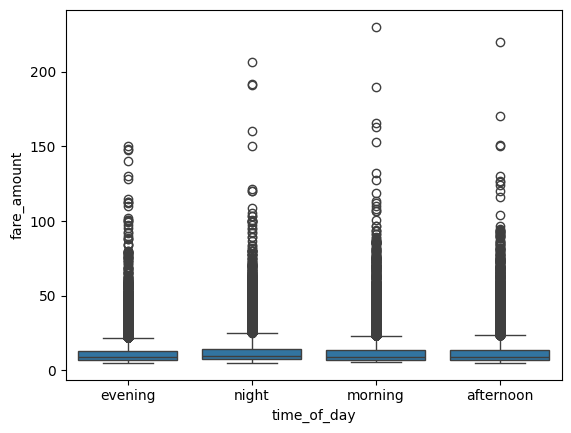

In [ ]:
sns.boxplot(x='time_of_day', y='fare_amount', data=df)

<Axes: xlabel='fare_amount'>

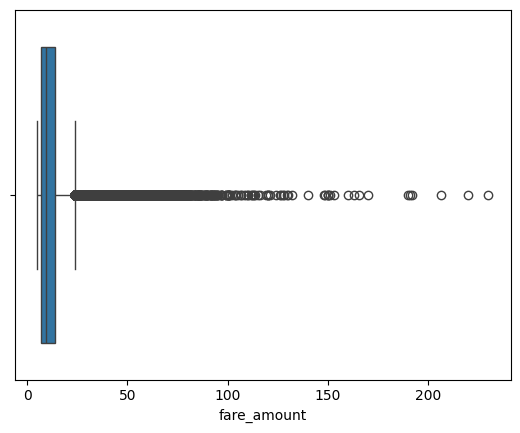

In [ ]:
sns.boxplot(x=df['fare_amount'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 130875
Test set size: 32719


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = ['fare_amount', 'distance_km']
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,1.635940e+05,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,1.635940e+05,163594.000000
mean,-5.407446e-17,-73.908928,40.686569,-73.907788,40.686810,1.695203,1.606163e-16,13.524689
std,1.000003e+00,2.711284,2.654585,2.711376,2.654954,1.315074,1.000003e+00,6.528907
min,-7.606773e-01,-77.316665,-74.015515,-75.458979,-74.015750,0.000000,-8.495003e-01,0.000000
25%,-5.670680e-01,-73.992523,40.735335,-73.991727,40.734119,1.000000,-4.991763e-01,9.000000
50%,-3.326989e-01,-73.982272,40.752737,-73.980567,40.753283,1.000000,-2.924895e-01,14.000000
75%,1.156594e-01,-73.968701,40.767040,-73.965106,40.767862,2.000000,1.347293e-01,19.000000
max,2.215655e+01,40.806012,42.478467,40.831932,42.464187,6.000000,8.246015e+01,23.000000


In [ ]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
count,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000
mean,0.033192,-73.908928,40.686569,-73.907788,40.686810,1.695203,0.010197,13.524689
std,0.043635,2.711284,2.654585,2.711376,2.654954,1.315074,0.012003,6.528907
min,0.000000,-77.316665,-74.015515,-75.458979,-74.015750,0.000000,0.000000,0.000000
25%,0.008448,-73.992523,40.735335,-73.991727,40.734119,1.000000,0.004205,9.000000
50%,0.018675,-73.982272,40.752737,-73.980567,40.753283,1.000000,0.006686,14.000000
75%,0.038239,-73.968701,40.767040,-73.965106,40.767862,2.000000,0.011814,19.000000
max,1.000000,40.806012,42.478467,40.831932,42.464187,6.000000,1.000000,23.000000


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

numerical_df.info()
numerical_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 163594 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        163594 non-null  float64
 1   pickup_longitude   163594 non-null  float64
 2   pickup_latitude    163594 non-null  float64
 3   dropoff_longitude  163594 non-null  float64
 4   dropoff_latitude   163594 non-null  float64
 5   passenger_count    163594 non-null  int64  
 6   distance_km        163594 non-null  float64
 7   pickup_hour        163594 non-null  int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 14.6 MB


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
24238194,0.010671,-73.999817,40.738354,-73.999512,40.723217,1,0.004309,19
27835199,0.011561,-73.994355,40.728225,-73.994710,40.750325,1,0.006417,20
44984355,0.034682,-74.005043,40.740770,-73.962565,40.772647,1,0.013437,21
25894730,0.000889,-73.976124,40.790844,-73.965316,40.803349,3,0.004250,8
17610152,0.048466,-73.925023,40.744085,-73.973082,40.761247,5,0.011910,17


In [ ]:
correlation_matrix = numerical_df.corr()

correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour
fare_amount,1.000000,0.013245,-0.009527,0.011497,-0.009326,0.009322,0.758088,-0.026873
pickup_longitude,0.013245,1.000000,-0.993939,0.999846,-0.993897,0.010867,0.003802,0.001077
pickup_latitude,-0.009527,-0.993939,1.000000,-0.993935,0.999896,-0.010939,-0.001763,-0.000352
dropoff_longitude,0.011497,0.999846,-0.993935,1.000000,-0.993885,0.010864,0.003843,0.000054
dropoff_latitude,-0.009326,-0.993897,0.999896,-0.993885,1.000000,-0.010881,-0.002140,-0.000394
passenger_count,0.009322,0.010867,-0.010939,0.010864,-0.010881,1.000000,0.000583,0.015343
distance_km,0.758088,0.003802,-0.001763,0.003843,-0.002140,0.000583,1.000000,-0.032589
pickup_hour,-0.026873,0.001077,-0.000352,0.000054,-0.000394,0.015343,-0.032589,1.000000


<Axes: >

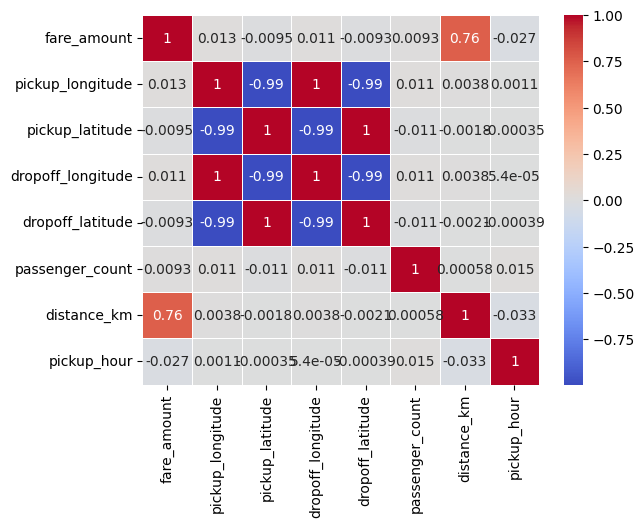

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

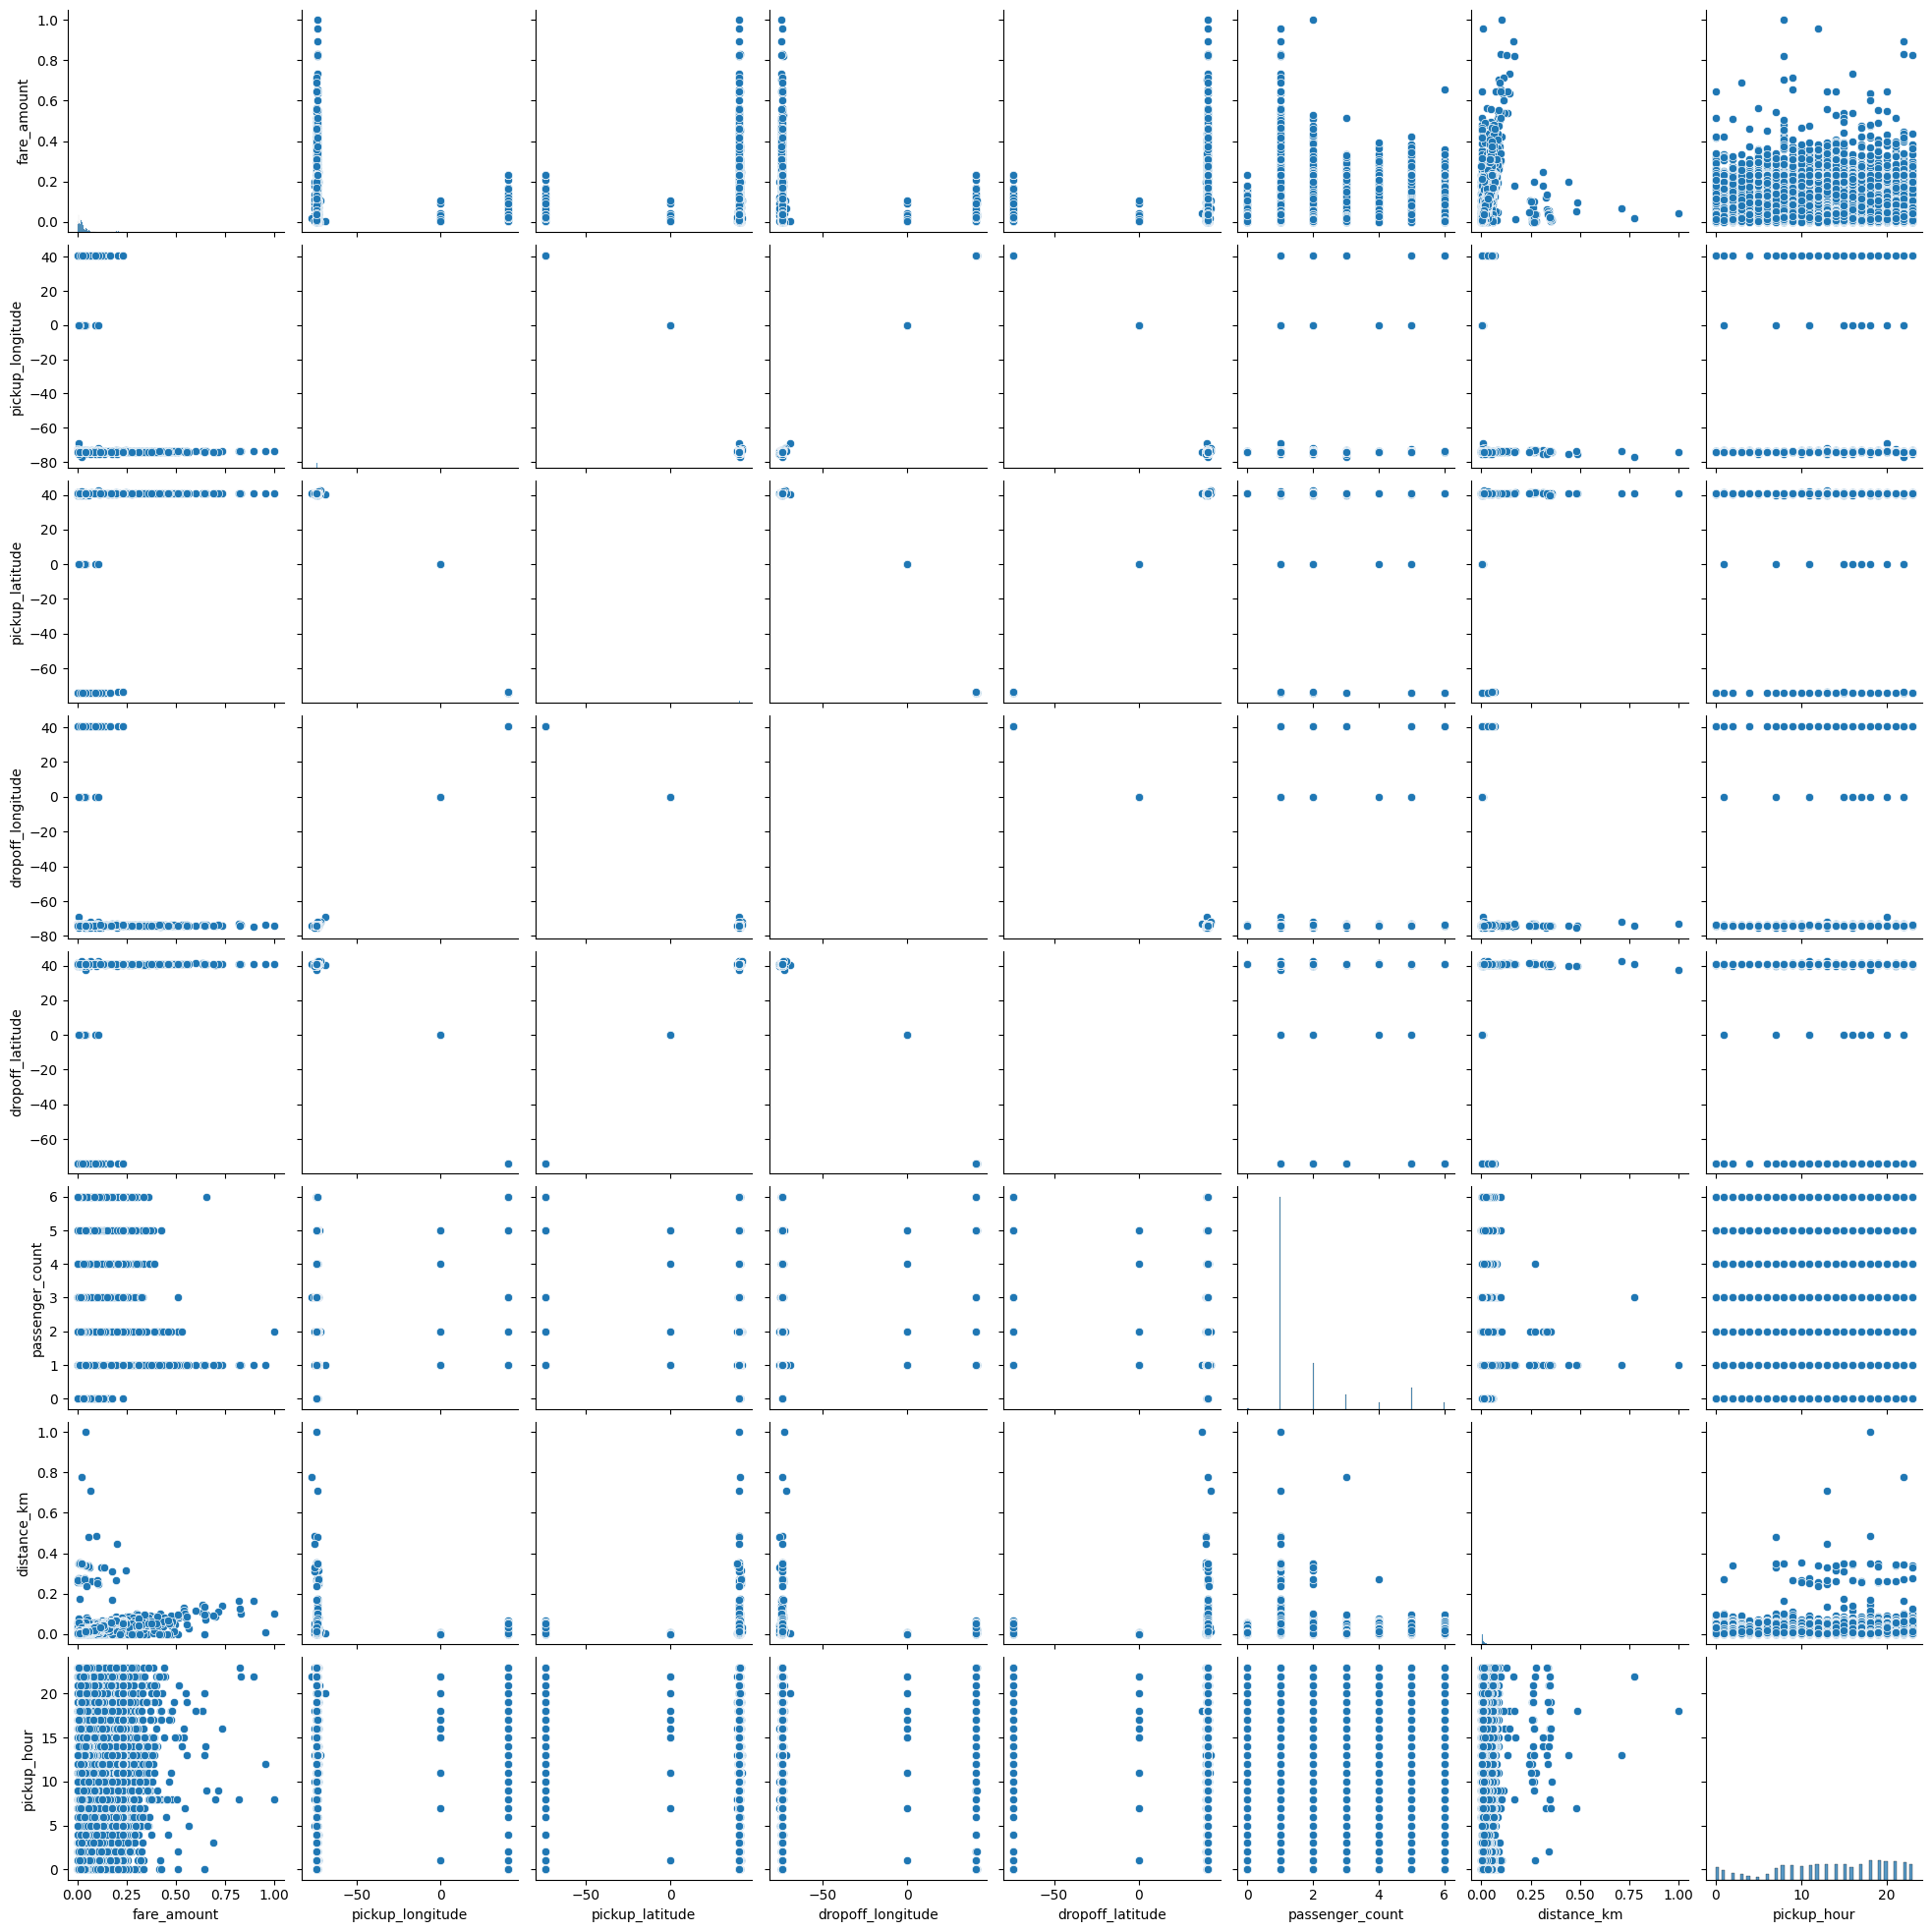

In [ ]:
sns.pairplot(numerical_df)  #